# Assignment 07

You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data"

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.

Assignment7/

- assignment_07.ipynb
- CollegeScorecard_Raw_Data/
    - ...
    - 'MERGED1996_97_PP.csv',
    - 'MERGED2015_16_PP.csv',
    - ...
    - 'MERGED2017_18_PP.csv'

### 1. Importing Libraries

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### 2. Displaying the current working directory using os.getcwd()

In [6]:
print(os.getcwd())

/Users/veeruvvc/Desktop/Yoshita/Fall2020/690-01/Assignment7


### 3. By using os library calling listdir which generates a list of files in a directory

In [7]:
files_list = os.listdir()
files_list

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'Assignment-7.ipynb',
 'MERGED2014_15_PP.csv',
 '.DS_Store',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'Crosswalks.zip',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'data.yaml',
 'MERGED2004_05_PP.csv',
 '.ipynb_checkpoints',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv']

### 4. Merging the files based on MERGED keyword

In [8]:
merged_files_list = [file for file in files_list if file.startswith("MERGED")]

merged_files_list.sort()
merged_files_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

### 5. Loading the required columns and using "usecols"

In [9]:
data_list = []

for file in merged_files_list:
    df = pd.read_csv(file, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df['YEAR'] = file[6:10]
    data_list.append(df)
    print(file)

MERGED1996_97_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
MERGED1999_00_PP.csv
MERGED2000_01_PP.csv
MERGED2001_02_PP.csv
MERGED2002_03_PP.csv
MERGED2003_04_PP.csv
MERGED2004_05_PP.csv
MERGED2005_06_PP.csv
MERGED2006_07_PP.csv
MERGED2007_08_PP.csv
MERGED2008_09_PP.csv
MERGED2009_10_PP.csv
MERGED2010_11_PP.csv
MERGED2011_12_PP.csv
MERGED2012_13_PP.csv
MERGED2013_14_PP.csv
MERGED2014_15_PP.csv
MERGED2015_16_PP.csv
MERGED2016_17_PP.csv
MERGED2017_18_PP.csv
MERGED2018_19_PP.csv


### 6. Exploring the new dataframe df

In [10]:
df = pd.concat(data_list)
df.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [11]:
df.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [12]:
df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
7379,481988,Vatterott College-ex'treme Institute by Nelly-...,MO,4.0,NaN,12850.0,2013
2582,178484,National Academy of Beauty Arts-St Louis,MO,4.0,NaN,NaN,1998
2788,209056,Lewis & Clark College,OR,8.0,0.7376,50934.0,2018
1537,154101,Northwestern College,IA,4.0,0.8597,13750.0,2001
3731,216782,Pittsburgh Career Institute,PA,2.0,NaN,NaN,2007


In [13]:
df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
UNITID           163331 non-null int64
INSTNM           163331 non-null object
STABBR           163331 non-null object
REGION           163330 non-null float64
ADM_RATE         44911 non-null float64
TUITIONFEE_IN    79194 non-null float64
YEAR             163331 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


In [15]:
df.dtypes

UNITID             int64
INSTNM            object
STABBR            object
REGION           float64
ADM_RATE         float64
TUITIONFEE_IN    float64
YEAR              object
dtype: object

In [16]:
df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367
std,4.571721e+06,2.189217,0.217062,9985.998016
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [17]:
df.isna().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

### 7. Creating a new dataframe umbc_df and retrieving the UMBC data

In [18]:
umbc_df = df[df["INSTNM"] == "University of Maryland-Baltimore County"]
umbc_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


### 8. Exploring the reterieved UMBC data

In [19]:
umbc_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [20]:
umbc_df.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [21]:
umbc_df.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [22]:
umbc_df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007


In [23]:
umbc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2151 to 1415
Data columns (total 7 columns):
UNITID           23 non-null int64
INSTNM           23 non-null object
STABBR           23 non-null object
REGION           23 non-null float64
ADM_RATE         18 non-null float64
TUITIONFEE_IN    19 non-null float64
YEAR             23 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [24]:
umbc_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


In [25]:
umbc_df.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

### 9. Plotting the UMBC in-state tution fee over the years using bar plot

Text(0, 0.5, 'TUITIONFEE')

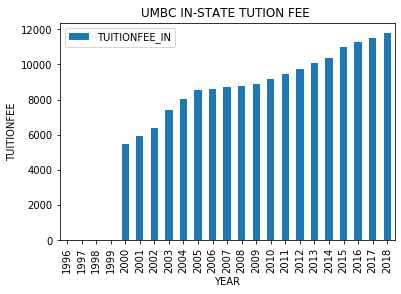

In [26]:
umbc_df.plot.bar(x = "YEAR", y = "TUITIONFEE_IN")
plt.title("UMBC IN-STATE TUTION FEE ")
plt.xlabel('YEAR')
plt.ylabel('TUITIONFEE')

### 10. Plotting the UMBC in-state tution fee over the years using line plot 

Text(0, 0.5, 'TUITIONFEE')

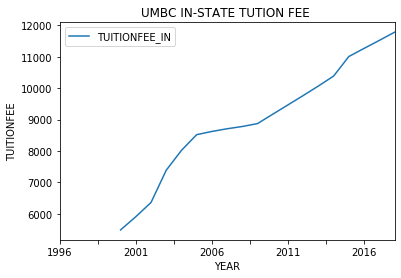

In [27]:
umbc_df.plot.line(x = "YEAR", y = "TUITIONFEE_IN")
plt.title("UMBC IN-STATE TUTION FEE ")
plt.xlabel('YEAR')
plt.ylabel('TUITIONFEE')

### 11. Converting the umbc tution fee into a list

In [28]:
tution_fee_list = umbc_df['TUITIONFEE_IN'].to_list()

In [29]:
tution_fee_list

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [258]:
#price_series = pd.Series(tution_fee_list)
#price_series.pct_change()

#### Calculating the umbc's percentage change in the tution fee

In [30]:
pct_change_list = []
for i in range(len(tution_fee_list)):
    increase = (tution_fee_list[i]-tution_fee_list[i-1])/tution_fee_list[i-1]
    percentage = (increase * 100)
    pct_change_list.append(percentage)

In [31]:
pct_change_list

[nan,
 nan,
 nan,
 nan,
 nan,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

#### Rounding the percentage change value upto two decimals.

In [32]:
roundup_percentage_list = []
for i in pct_change_list:
        roundup_percentage_list.append(round(i,2))

In [33]:
print(roundup_percentage_list)

[nan, nan, nan, nan, nan, 7.65, 7.65, 16.13, 8.55, 6.23, 1.2, 1.0, 0.83, 1.05, 3.37, 3.23, 3.14, 3.11, 3.14, 5.99, 2.34, 2.25, 2.26]


#### Updating the umbc dataframe with the PCT_CHANGE column to hold the percentage change values

In [34]:
umbc_df['PCT_CHANGE'] = np.array(roundup_percentage_list)

/Users/veeruvvc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Plotting the bar plot UMBC's percentage change in fee with respect to year 

Text(0, 0.5, 'PERCENTAGE CHANGE')

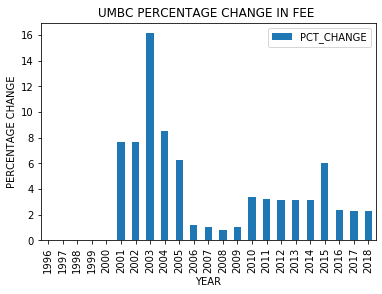

In [35]:
umbc_df.plot.bar(x='YEAR',y='PCT_CHANGE')
plt.title("UMBC PERCENTAGE CHANGE IN FEE ")
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE CHANGE')

#### Plotting the line plot UMBC's percentage change in fee with respect to year 

Text(0, 0.5, 'PERCENTAGE CHANGE')

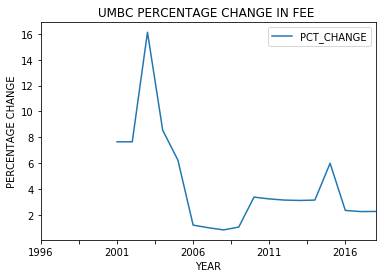

In [36]:
umbc_df.plot.line(x='YEAR',y='PCT_CHANGE')
plt.title("UMBC PERCENTAGE CHANGE IN FEE ")
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE CHANGE')

### 12. Creating a function which takes list of tuitions and returns a list of percentage change in the tution fee over the years

In [37]:
def pct_change(tution_fee_list):
    pct_change_list = []
    for i in range(len(tution_fee_list)):
        increase = (tution_fee_list[i]-tution_fee_list[i-1])/tution_fee_list[i-1]
        percentage = (increase * 100)
        pct_change_list.append(percentage)
    roundup_percentage_list = []
    for i in pct_change_list:
        roundup_percentage_list.append(round(i,2))
    return roundup_percentage_list

### 13. Retereving and exploring the JHU data

In [38]:
jhu_df = df[df["INSTNM"] == "Johns Hopkins University"]
jhu_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


In [39]:
jhu_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000


In [40]:
jhu_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1603,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014
1548,162928,Johns Hopkins University,MD,2.0,0.1412,48710.0,2015
1503,162928,Johns Hopkins University,MD,2.0,0.1284,50410.0,2016
1473,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017
1410,162928,Johns Hopkins University,MD,2.0,0.1148,53740.0,2018


### 14. Plotting a bar plot for JHU tution fee over the years

Text(0, 0.5, 'TUTION FEE')

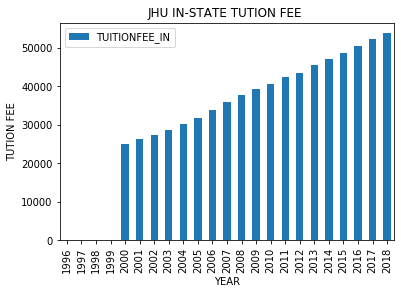

In [56]:
jhu_df.plot.bar(x='YEAR',y='TUITIONFEE_IN')
plt.title("JHU IN-STATE TUTION FEE ")
plt.xlabel('YEAR')
plt.ylabel('TUTION FEE')

#### Plotting a line plot for JHU tution fee over the years

Text(0, 0.5, 'TUTION FEE')

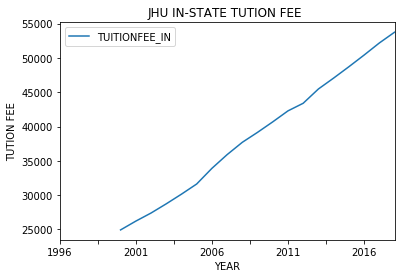

In [57]:
jhu_df.plot.line(x='YEAR',y='TUITIONFEE_IN')
plt.title("JHU IN-STATE TUTION FEE ")
plt.xlabel('YEAR')
plt.ylabel('TUTION FEE')

### 15. Calculating the JHU tuition fee percentge change using the function pct_change()

In [41]:
tution_fee_list = jhu_df['TUITIONFEE_IN'].tolist()
jhu_list = pct_change(tution_fee_list)

### 16. Adding the list of percentage changes to the JHU dataframe as a new column ("PCT_CHANGE")

In [42]:
jhu_df['PCT_CHANGE'] = np.array(jhu_list)

/Users/veeruvvc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 17. Plotting a bar plot to display the percentage change in tution fee over the years


Text(0, 0.5, 'PERCENTAGE CHANGE')

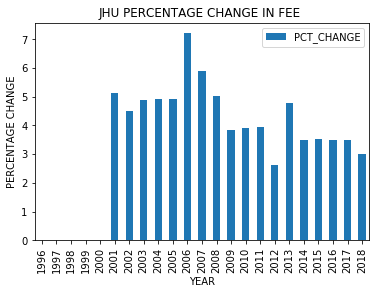

In [43]:
jhu_df.plot.bar(x='YEAR',y='PCT_CHANGE')
plt.title("JHU PERCENTAGE CHANGE IN FEE ")
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE CHANGE')

### 18. Plotting a bar plot to display the percentage change in tution fee over the years

Text(0, 0.5, 'PERCENTAGE CHANGE')

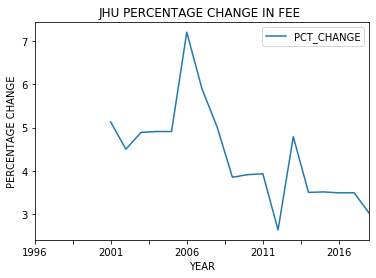

In [60]:
jhu_df.plot.line(x='YEAR',y='PCT_CHANGE')
plt.title("JHU PERCENTAGE CHANGE IN FEE ")
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE CHANGE')

### 19.Using the new data frame for both UMBC and JHU

In [45]:
umbc_new = umbc_df[['YEAR']]

In [46]:
umbc_new['UMBC_PCT'] = umbc_df['PCT_CHANGE']

/Users/veeruvvc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
umbc_new.head()

,YEAR,UMBC_PCT
2151,1996,NaN
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN


#### Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
#### Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

In [48]:
jhu_new = jhu_df[['YEAR']]

In [49]:
jhu_new['JHU_PCT'] = jhu_df['PCT_CHANGE']

/Users/veeruvvc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
jhu_new.head()

,YEAR,JHU_PCT
2139,1996,NaN
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN


### 20. Merging the two data frames

In [51]:
merged_df = pd.merge(umbc_new,jhu_new)

In [52]:
merged_df.head()

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN


### 21. Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

Text(0, 0.5, 'PERCENTAGE CHANGE')

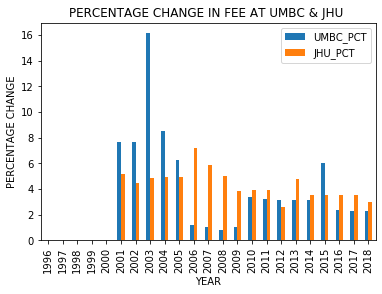

In [59]:
merged_df.plot.bar(x='YEAR',y=["UMBC_PCT","JHU_PCT"])
plt.title("PERCENTAGE CHANGE IN FEE AT UMBC & JHU ")
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE CHANGE')

### 21. Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

Text(0, 0.5, 'PERCENTAGE CHANGE')

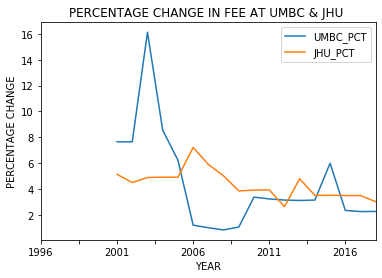

In [54]:
merged_df.plot.line(x='YEAR',y=["UMBC_PCT","JHU_PCT"])
plt.title("PERCENTAGE CHANGE IN FEE AT UMBC & JHU ")
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE CHANGE')

### OBSERVATIONS/CONCLUSIONS:

Based on the above plot we can conclude that:
1. Percentage change in tution fee at UMBC is highest in the year 2003 and it is 16%.
2. The heighest percentage change in tution fee at JHU is in the year 2006 and it is around 7%.
2. Percentage change in tution fee at UMBC is higher than JHU from 2001 to 2005.
3. We can observe a sudden increase in tution fee in JHU from 2006.
4. In 2005 UMBC has the lowest increse in tution fee.
5. The percentage change at UMBC has gradually decreased from 2006 t0 2009 but a suddenly increased in 2006 to 2018.